## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
new_df=pd.merge(mouse_metadata,study_results,on='Mouse ID',sort=True)
# Display the data table for preview
new_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,0,45.000000,0
1,a203,Infubinol,Female,20,23,5,48.508468,0
2,a203,Infubinol,Female,20,23,10,51.852437,1
3,a203,Infubinol,Female,20,23,15,52.777870,1
4,a203,Infubinol,Female,20,23,20,55.173336,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
mice = new_df['Mouse ID'].nunique()
mice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate=new_df.duplicated(subset=['Mouse ID','Timepoint'],keep=False)
duplicate
dup_mice=new_df.loc[duplicate]
dup_mice_ID=dup_mice['Mouse ID'].unique()
dup_mice_ID= pd.Series(dup_mice_ID)
print(dup_mice_ID)

0    g989
dtype: object


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
#new_df1=new_df.set_index('Mouse ID')
#new_df1
unique_df=new_df.loc[new_df['Mouse ID'].isin(dup_mice_ID)]
unique_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
586,g989,Propriva,Female,21,26,0,45.000000,0
587,g989,Propriva,Female,21,26,0,45.000000,0
588,g989,Propriva,Female,21,26,5,48.786801,0
589,g989,Propriva,Female,21,26,5,47.570392,0
590,g989,Propriva,Female,21,26,10,51.745156,0
591,g989,Propriva,Female,21,26,10,49.880528,0
592,g989,Propriva,Female,21,26,15,51.325852,1
593,g989,Propriva,Female,21,26,15,53.442020,0
594,g989,Propriva,Female,21,26,20,55.326122,1
595,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
unique_df=new_df[new_df['Mouse ID'] != dup_mice_ID.iloc[0]]
unique_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,0,45.000000,0
1,a203,Infubinol,Female,20,23,5,48.508468,0
2,a203,Infubinol,Female,20,23,10,51.852437,1
3,a203,Infubinol,Female,20,23,15,52.777870,1
4,a203,Infubinol,Female,20,23,20,55.173336,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
mice = unique_df['Mouse ID'].nunique()
mice


248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.
group_df=unique_df.groupby(['Drug Regimen'])
mean=group_df['Tumor Volume (mm3)'].mean()
median=group_df['Tumor Volume (mm3)'].median()
variance=group_df['Tumor Volume (mm3)'].var()
sd=group_df['Tumor Volume (mm3)'].std()
sem=group_df['Tumor Volume (mm3)'].sem()
count=group_df['Mouse ID'].count()
list_of_series=(mean, median,variance,sd,sem,count)
summary_df=pd.DataFrame(list_of_series)
summary_df=summary_df.transpose()
summary_df.columns=['mean','median','variance','standard deviation','SEM','count']
summary_df


,mean,median,variance,standard deviation,SEM,count
Drug Regimen,,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346,230.0
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821,178.0
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236,178.0
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860,188.0
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466,186.0
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331,181.0
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332,148.0
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955,228.0
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111,181.0


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
unique_df_1=unique_df
df_1=unique_df_1[['Drug Regimen','Tumor Volume (mm3)']]
table=df_1.groupby(['Drug Regimen']).agg(['mean', 'median','var','std','sem'])
table

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0, 0.5, 'Total number of mice')

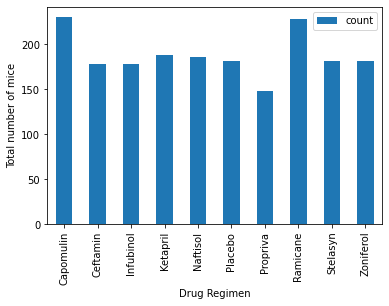

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
ax=summary_df.plot.bar(y='count')
ax.set_ylabel("Total number of mice")

<BarContainer object of 10 artists>

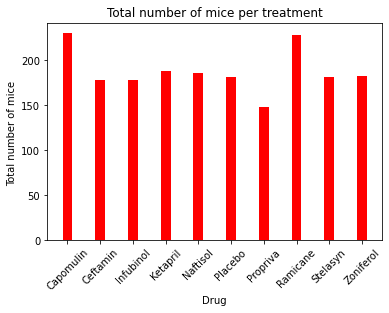

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
list_of_drug=summary_df.index.values.tolist()
plt.title("Total number of mice per treatment")
plt.xlabel("Drug")
plt.ylabel("Total number of mice ")
plt.xticks(rotation=45)
plt.bar(list_of_drug,summary_df['count'], width=0.3, align="center",facecolor="red")


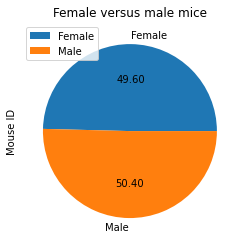

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_df=unique_df.groupby(['Sex'])
count=sex_df['Mouse ID'].nunique()
pie_sex=count.plot.pie(y='Sex',title="Female versus male mice",autopct='%.2f')
pie_sex.legend(loc=2)
pie_sex


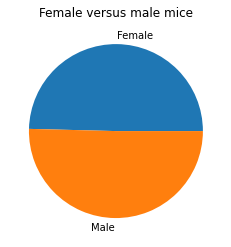

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.title("Female versus male mice")
pie_plt=plt.pie(count,labels=["Female","Male"])

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
list_treatment= ["Capomulin", "Ramicane", "Infubinol","Ceftamin"]
# Start by getting the last (greatest) timepoint for each mouse
unique_df=unique_df.sort_values(by=['Mouse ID','Timepoint'])
treatment_tumor_df=unique_df.drop_duplicates(['Mouse ID'],keep='last')
treatment_tumor_df_filtered=treatment_tumor_df.loc[treatment_tumor_df['Drug Regimen'].isin(list_treatment)]
treatment_tumor_df_filtered
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,a203,Infubinol,Female,20,23,45,67.973419,2
19,a251,Infubinol,Female,21,25,45,65.525743,1
39,a275,Ceftamin,Female,20,28,45,62.999356,3
66,a411,Ramicane,Male,3,22,45,38.407618,1
76,a444,Ramicane,Female,10,25,45,43.047543,0
...,...,...,...,...,...,...,...,...
1825,y769,Ceftamin,Female,6,27,45,68.594745,4
1835,y793,Capomulin,Male,17,17,45,31.896238,2
1845,y865,Ceftamin,Male,23,26,45,64.729837,3
1862,z578,Ramicane,Male,11,16,45,30.638696,0


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes
# add subset 
# Determine outliers using upper and lower bounds

treatment_group=treatment_tumor_df_filtered.groupby(['Drug Regimen'])
quartiles=treatment_group['Tumor Volume (mm3)'].quantile()
lowerq = quartiles*0.25
upperq = quartiles*0.75
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

Values below Drug Regimen
Capomulin   -19.062582
Ceftamin    -29.925978
Infubinol   -30.082590
Ramicane    -18.280826
Name: Tumor Volume (mm3), dtype: float64 could be outliers.
Values above Drug Regimen
Capomulin    57.187747
Ceftamin     89.777933
Infubinol    90.247771
Ramicane     54.842478
Name: Tumor Volume (mm3), dtype: float64 could be outliers.


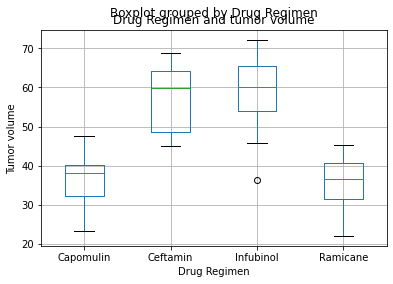

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
treatment_tumor_df_filtered.boxplot(by='Drug Regimen',column='Tumor Volume (mm3)')
plt.ylabel("Tumor volume")
plt.title("Drug Regimen and tumor volume")
plt.show()

## Line and Scatter Plots

Text(0, 0.5, 'Tumor volume')

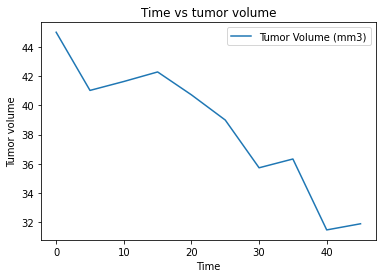

In [16]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
Capomulin_line_df=unique_df.loc[unique_df['Mouse ID']=="y793"]
Capomulin_line_df.plot.line(x='Timepoint',y='Tumor Volume (mm3)')
plt.title("Time vs tumor volume")
plt.xlabel("Time")
plt.ylabel("Tumor volume")

<function matplotlib.pyplot.show(*args, **kw)>

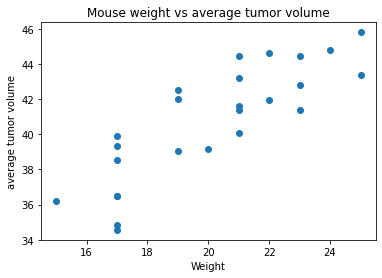

In [17]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
Capomulin_scatter_df=unique_df.loc[unique_df['Drug Regimen']=="Capomulin"]
Capomulin_scatter_group_df=Capomulin_scatter_df.groupby(['Mouse ID'])
avg_tumor = Capomulin_scatter_group_df['Tumor Volume (mm3)'].mean()
weight= Capomulin_scatter_group_df['Weight (g)'].mean()

plt.scatter(x=weight,y=avg_tumor)
plt.title("Mouse weight vs average tumor volume")
plt.xlabel("Weight")
plt.ylabel("average tumor volume")
plt.show

## Correlation and Regression

The correlation coefficient between mouse weigh and  average tumor volume is 0.84


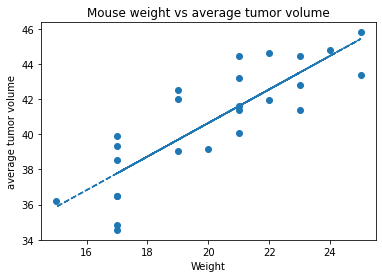

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
print(f"The correlation coefficient between mouse weigh and  average tumor volume is {round(st.pearsonr(weight,avg_tumor)[0],2)}")
vc_slope, vc_int, vc_r, vc_p, vc_std_err = st.linregress(weight, avg_tumor)
vc_fit = vc_slope * weight + vc_int
plt.scatter(weight,avg_tumor)
plt.plot(weight,vc_fit,"--")
plt.title("Mouse weight vs average tumor volume")
plt.xlabel("Weight")
plt.ylabel("average tumor volume")
plt.show()